In [1]:
import MDAnalysis as mda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','notebook'])

/home/daneel/gitrepos/mdanalysis/package/MDAnalysis/lib/_distopia.py:51: RuntimeWarning: distopia version 0.3.1 is too old; need at least 0.4.0, Your installed version of distopia will NOT be used.
  warnings.warn(


In [18]:
import pandas as pd

#Read all the trajectories
dna_101_ku04amp01_model0= mda.Universe('molecular_dynamics/dna_sequence_101_peptide_model_0/sys_prod/prod_start.pdb', 'molecular_dynamics/dna_sequence_101_peptide_model_0/sys_prod/prod_dna_sequence_101_peptide_model_0_compact_compact.xtc')

dna_85_ku04amp01_model0= mda.Universe('molecular_dynamics/dna_sequence_85_peptide_model_0/sys_prod/prod_start.pdb', 'molecular_dynamics/dna_sequence_85_peptide_model_0/sys_prod/prod_dna_sequence_85_peptide_model_0_compact_compact.xtc')

dna_72_ku04amp01_model0= mda.Universe('molecular_dynamics/dna_sequence_72_peptide_model_0/sys_prod/prod_start.pdb', 'molecular_dynamics/dna_sequence_72_peptide_model_0/sys_prod/prod_dna_sequence_72_peptide_model_0_compact_compact.xtc')

sims = {'72':dna_72_ku04amp01_model0,'85':dna_85_ku04amp01_model0, '101':dna_101_ku04amp01_model0}



## RMSD Calculation

RMSD of DNA

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

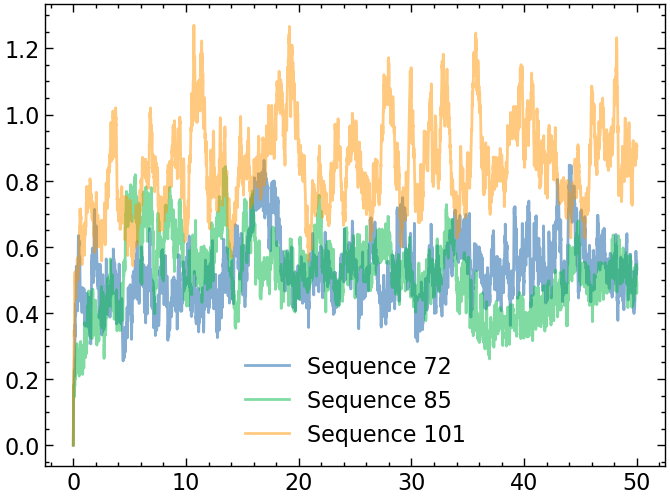

In [19]:
from MDAnalysis.analysis import rms

dfs = {}

for key, value in sims.items():
    R = rms.RMSD(value,  # universe to align
        value,  # reference universe or atomgroup
        select='nucleic',  # group to superimpose and calculate RMSD
        ref_frame=0)  # frame index of the reference

    R.run(verbose=True)
    times = R.results.rmsd[:,1]
    rmsd = R.results.rmsd[:,2]
    plt.plot(times/1000, rmsd/10, alpha=0.5, label=f'Sequence {key}')
    df_rmsd = pd.DataFrame(np.vstack((times, rmsd)).T, columns=["DNA rmsd time", "DNA rmsd"])
    dfs[key] = df_rmsd

plt.legend()


RMSD of Peptide

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

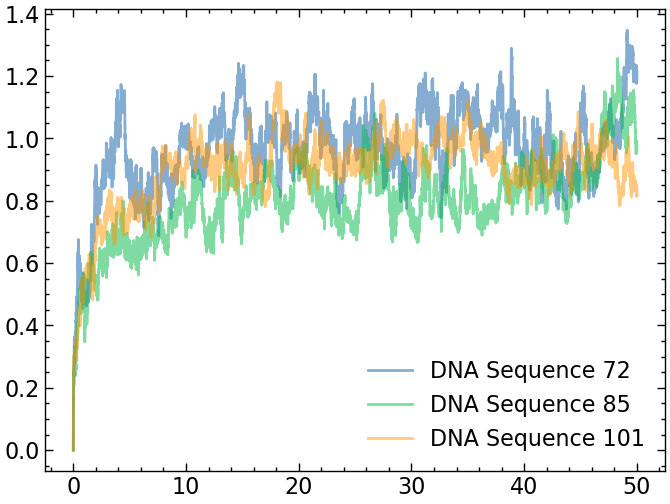

In [20]:
from MDAnalysis.analysis import rms

for key, value in sims.items():
    R = rms.RMSD(value,  # universe to align
        value,  # reference universe or atomgroup
        select='protein',  # group to superimpose and calculate RMSD
        ref_frame=0)  # frame index of the reference

    R.run(verbose=True)
    times = R.results.rmsd[:,1]
    rmsd = R.results.rmsd[:,2]
    plt.plot(times/1000, rmsd/10, alpha=0.5, label=f'DNA Sequence {key}')
    dfs[key] = pd.concat([dfs[key], pd.DataFrame(np.vstack((times, rmsd)).T, columns=["Peptide rmsd time", "Peptide rmsd"])], axis=1)

plt.legend()


## Radius of Gyration Calculation

$R_g$ of the DNA

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

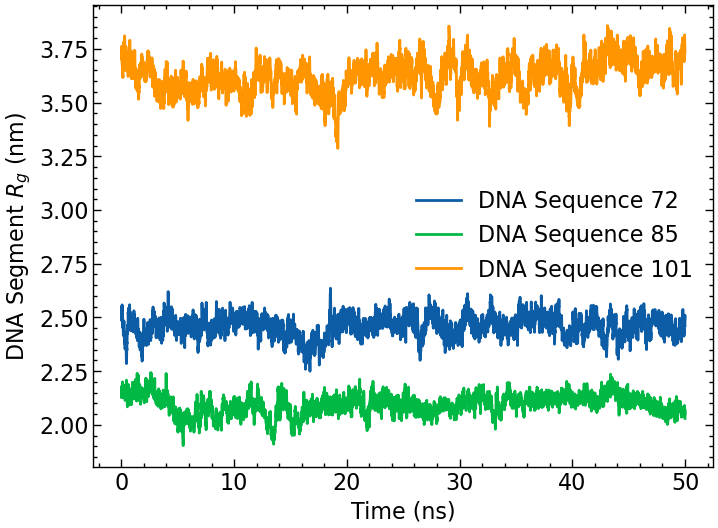

In [21]:
from tqdm.notebook import tqdm


for key, value in sims.items():
    
	group = value.select_atoms('nucleic')		# change the atom selection for your specific system

	Frame = []
	times = []
	Rgyr = []
	for ts in tqdm(value.trajectory):
		Frame.append(ts.frame)
		times.append(value.trajectory.time)
		Rgyr.append(group.radius_of_gyration())

	Rgyrc_table = np.vstack((Frame, times, Rgyr)).T
	dfs[key] = pd.concat([dfs[key], pd.DataFrame(Rgyrc_table, columns=["DNA Rgyr frame", "DNA Rgyr time (ps)", "DNA Rgyr (A)"])], axis=1)
	plt.plot(Rgyrc_table[:,1]/1000, Rgyrc_table[:,2]/10, label=f'DNA Sequence {key}')

plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel(r'DNA Segment $R_g$ (nm)')
plt.show()

$R_g$ of peptide

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

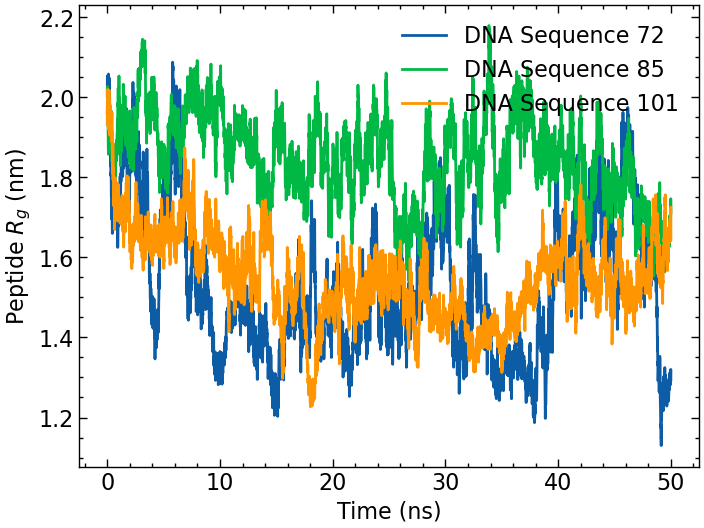

In [22]:
from tqdm.notebook import tqdm


for key, value in sims.items():
    
	group = value.select_atoms('protein')		# change the atom selection for your specific system

	Frame = []
	times = []
	Rgyr = []
	for ts in tqdm(value.trajectory):
		Frame.append(ts.frame)
		times.append(value.trajectory.time)
		Rgyr.append(group.radius_of_gyration())

	Rgyrc_table = np.vstack((Frame, times, Rgyr)).T
	dfs[key] = pd.concat([dfs[key], pd.DataFrame(Rgyrc_table, columns=["Peptide Rgyr frame", "Peptide Rgyr time (ps)", "Peptide Rgyr (A)"])], axis=1)
	plt.plot(Rgyrc_table[:,1]/1000, Rgyrc_table[:,2]/10, label=f'DNA Sequence {key}')

plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel(r'Peptide $R_g$ (nm)')
plt.show()

## RMSF Calculation

Between protein backbone and Carbon alphas.

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

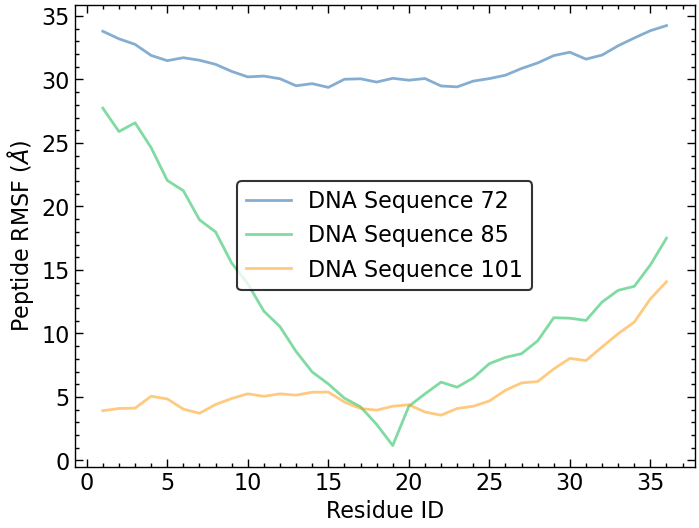

In [23]:
from tqdm.notebook import tqdm

for key, value in sims.items():
    
    c_alphas_c = value.select_atoms('protein and backbone and name CA')
	
    R_c = rms.RMSF(c_alphas_c).run(verbose=True)
    plt.plot(c_alphas_c.resids, R_c.results.rmsf, alpha=0.5, label=f'DNA Sequence {key}')
    dfs[key] = pd.concat([dfs[key], pd.DataFrame(np.vstack((c_alphas_c.resids, R_c.results.rmsf)).T, columns=["Peptide Resids", "RMSF (A)"])], axis=1)

plt.xlabel('Residue ID')
plt.ylabel(r'Peptide RMSF $\left(\AA\right)$')
leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.5)

## Hydrogen Bond Analysis

### H-bond parameters
  - *d_h_cutoff* (Å) [1.2] : Distance cutoff used for finding donor-hydrogen pairs
  - *d_a_cutoff* (Å) [3.0] : Distance cutoff for hydrogen bonds. This cutoff refers to the D-A distance.
  - *d_h_a_angle_cutoff* (degrees) [150] : D-H-A angle cutoff for hydrogen bonds.

### DNA Sequence 101

First, convert the tpr file to include only protein and DNA topologies


```bash
gmx convert-tpr -s prod_dna_sequence_101_peptide_model_0.tpr -n ../dna_sequence_101_peptide_model_0_water_ion.ndx -o prod_dna_sequence_101_peptide_model_0_compact_compact.tpr
```

Select 'Protein_DNA' and repeat for all trajectories.

In [4]:
#Giving full tpr file to include bonding info
u = mda.Universe("molecular_dynamics/dna_sequence_101_peptide_model_0/sys_prod/prod_dna_sequence_101_peptide_model_0_compact_compact.tpr", "molecular_dynamics/dna_sequence_101_peptide_model_0/sys_prod/prod_dna_sequence_101_peptide_model_0_compact_compact.xtc")
nucleic = u.select_atoms('resname DNA')
protein = u.select_atoms('protein')
num_residues = len(protein.residues)

Note that we're selecting DNA and protein, so the selections need not be updated with each frame. Setting `update_selections=False` drastically speeds up the hbonds run.

**Note** The selections need to be super precise and atom specific, otherwise there will be many false positives during the hydrogen bond detection, as it will try to 'detect' hydrogen bonds for every atom in the selection, even ones that aren't electronegative enough to be donors and/or acceptors. So selections for donors and acceptors should be obtained with the `guess_` methods.

In [28]:
nucleotides = ["DA", "DG", "DT", "DC"]
amino_acids = [
    "ALA", "CYS", "ASP", "GLU", "PHE", "GLY", "HIS", "ILE", "LYS", "LEU",
    "MET", "ASN", "PRO", "GLN", "ARG", "SER", "THR", "VAL", "TRP", "TYR"
]

In [8]:
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

hbonds_prot_DNA = HBA(universe=u,
        update_selections=False
        )

hbonds_prot_DNA.donors_sel = hbonds_prot_DNA.guess_donors("protein")
hbonds_prot_DNA.hydrogens_sel = hbonds_prot_DNA.guess_hydrogens("protein")
hbonds_prot_DNA.acceptors_sel = hbonds_prot_DNA.guess_acceptors("not protein")

hbonds_prot_DNA.run(verbose=True)

  0%|          | 0/5001 [00:00<?, ?it/s]

The average number of each type of hydrogen bond formed at each frame is likely more informative than the total number over the trajectory. This can be calculated for each hydrogen bond type as follows:

In [ ]:
from tqdm.notebook import tqdm
from collections import Counter
from tabulate import tabulate

donors = []
acceptors = []


for hbond in tqdm(hbonds_prot_DNA.results.hbonds):
    frame, donor_ix, hydrogen_ix, acceptor_ix = hbond[:4].astype(int)
    u.trajectory[frame]
    donor_resname = u.atoms[donor_ix].resname
    acceptor_resname = u.atoms[acceptor_ix].resname
    if donor_resname in amino_acids and acceptor_resname in nucleotides:#Exclude DNA donors
        atoms = u.atoms[[donor_ix, hydrogen_ix, acceptor_ix]]
        donors.append(f'{str(u.atoms[donor_ix].resid)}-{u.atoms[donor_ix].resname}')
        acceptors.append(f'{str(u.atoms[acceptor_ix].resid)}-{u.atoms[acceptor_ix].resname}')
    
donors_dict = dict(Counter(donors))
acceptors_dict = dict(Counter(acceptors))



In [54]:
table_data = [[donor, count] for donor, count in donors_dict.items()]
table_data.sort(key=lambda x: int(x[0].split('-')[0]))
print(tabulate(table_data, headers=["Donor", "Count"], tablefmt="grid"))

+---------+---------+
| Donor   |   Count |
+=========+=========+
| 2-ASN   |     837 |
+---------+---------+
| 3-LYS   |    1717 |
+---------+---------+
| 5-LYS   |    1031 |
+---------+---------+
| 6-SER   |    1366 |
+---------+---------+
| 7-LYS   |     680 |
+---------+---------+
| 8-LYS   |    1304 |
+---------+---------+
| 9-ARG   |    2333 |
+---------+---------+
| 11-LYS  |     176 |
+---------+---------+
| 13-LYS  |     775 |
+---------+---------+
| 15-SER  |      90 |
+---------+---------+
| 16-SER  |    2468 |
+---------+---------+
| 18-ARG  |    4422 |
+---------+---------+
| 21-GLN  |    1741 |
+---------+---------+
| 22-THR  |    3614 |
+---------+---------+
| 24-SER  |    1304 |
+---------+---------+
| 31-GLN  |     311 |
+---------+---------+
| 33-TYR  |     442 |
+---------+---------+
| 34-LYS  |    1026 |
+---------+---------+


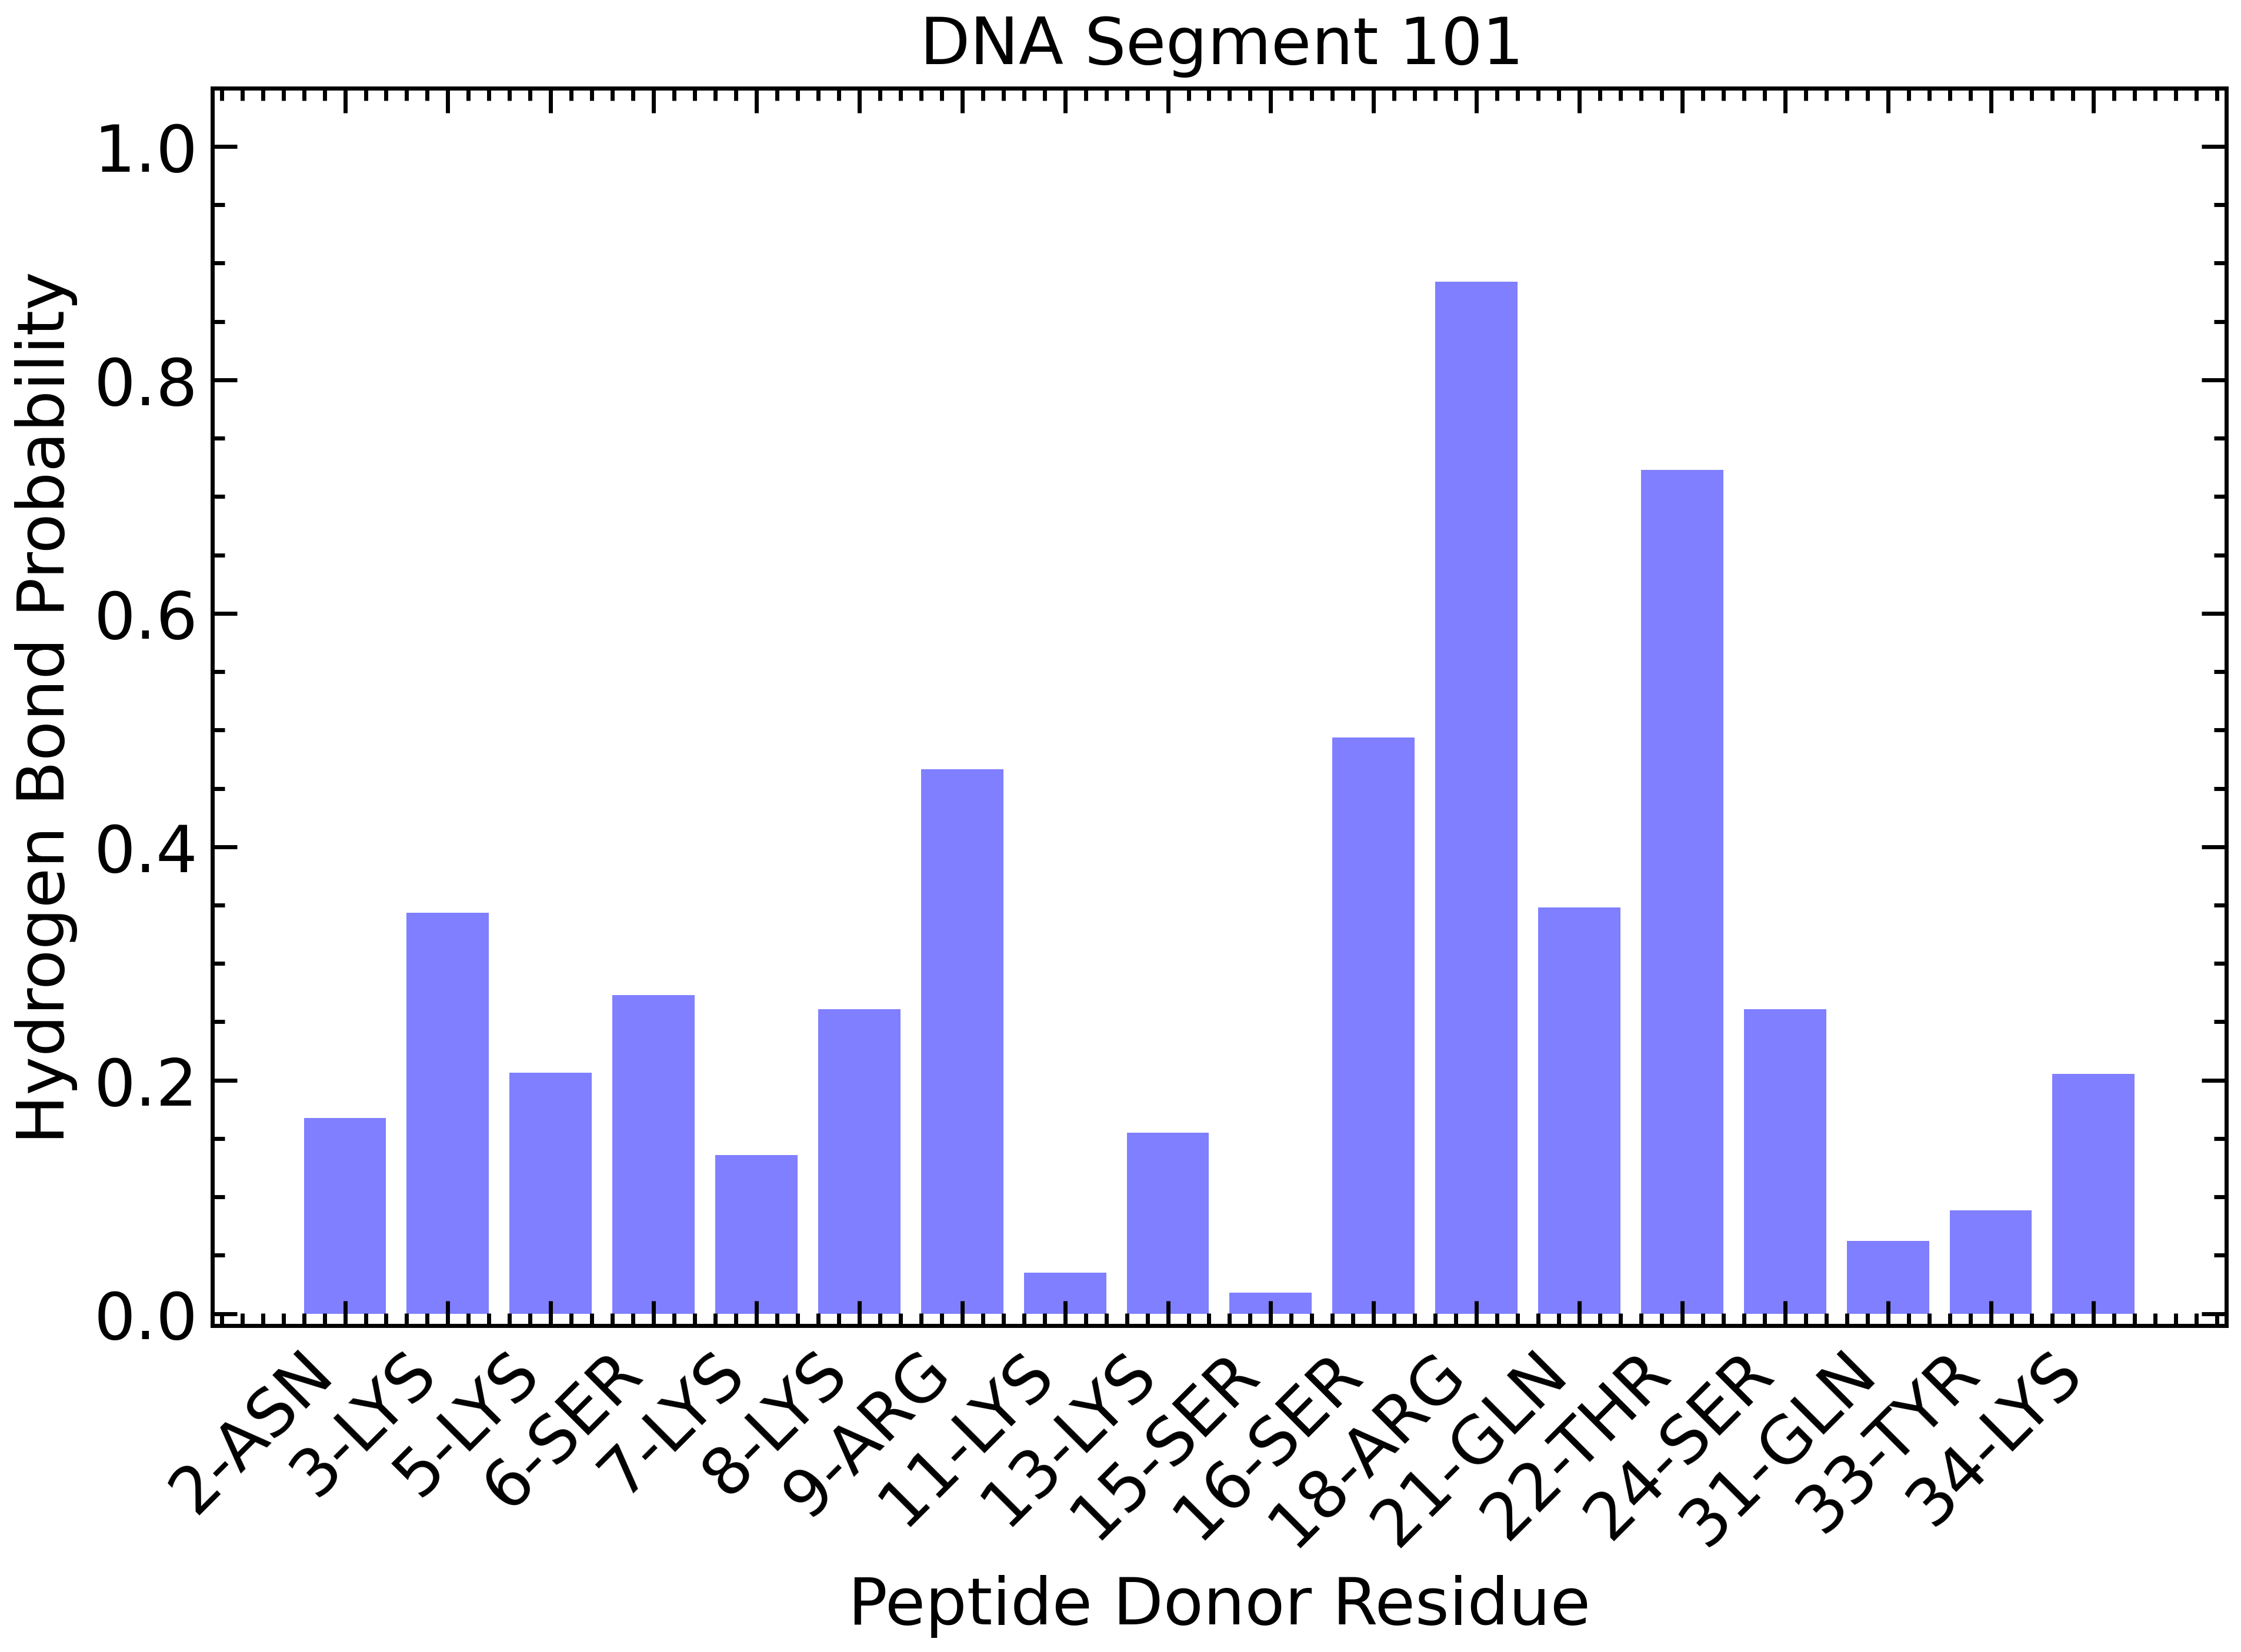

In [59]:
# Extract donors and counts from table_data
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','notebook'])

donors_names = np.array([row[0] for row in table_data])
counts =np.array( [row[1] for row in table_data])/hbonds_prot_DNA.n_frames

plt.figure()
plt.bar(donors_names, counts, color= "blue", alpha=0.5)
plt.xlabel("Peptide Donor Residue")
plt.ylabel("Hydrogen Bond Probability")
plt.title(r"DNA Segment $101$")
plt.xticks(rotation=45, ha='right')
plt.ylim(-0.01,1.05)
plt.tight_layout()
plt.show()

### Combined output 

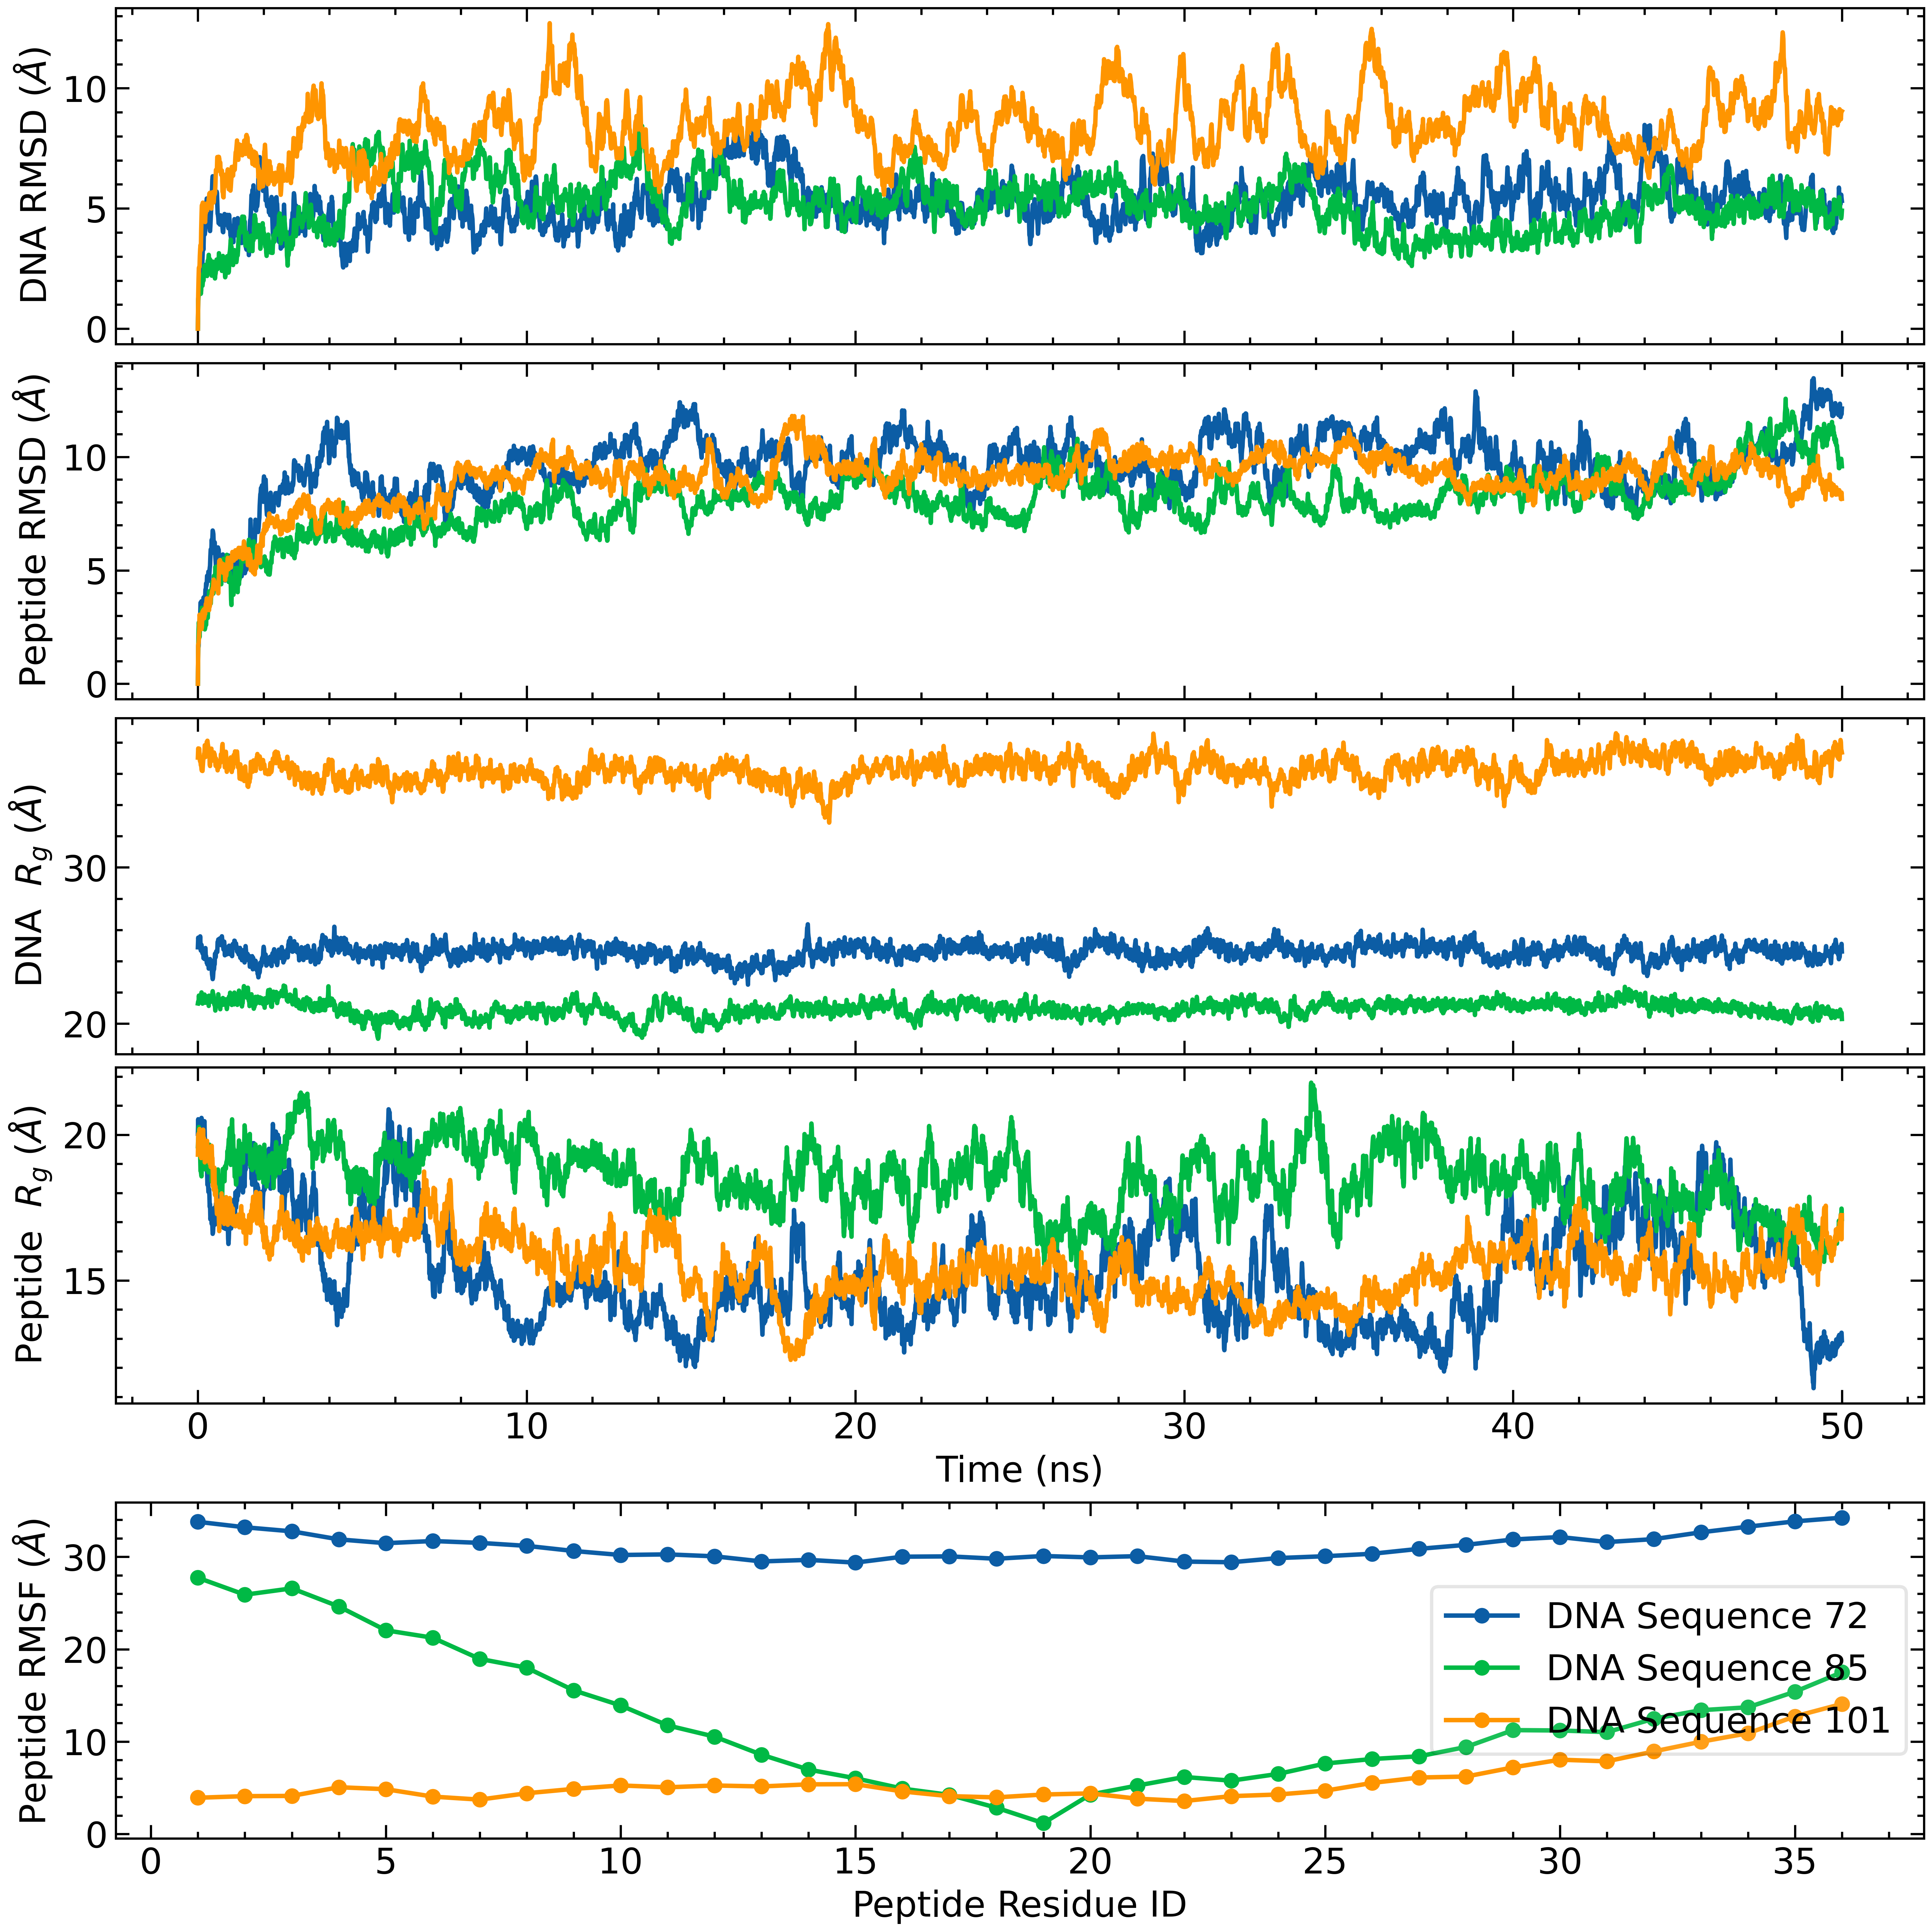

In [16]:
fig, axs = plt.subplots(5, 1, figsize=(12, 12), constrained_layout=True)
for key, df in dfs.items():
    # Panel 1: DNA RMSD vs Time
    axs[0].plot(df["DNA rmsd time"]/1000, df["DNA rmsd"], label=f"DNA Sequence {key}")
    axs[0].set_ylabel(r"DNA RMSD $\left(\AA\right)$")
    axs[0].set_xticklabels([])
    #axs[0].legend()
    
    # Panel 2: Peptide RMSD vs Time
    axs[1].plot(df["Peptide rmsd time"]/1000, df["Peptide rmsd"], label=f"DNA Sequence {key}")
    axs[1].set_ylabel(r"Peptide RMSD $\left(\AA\right)$")
    axs[1].set_xticklabels([])
    #axs[1].legend()

    # Panel 3: Radius of Gyration (DNA) vs Time
    axs[2].plot(df["DNA Rgyr time (ps)"] / 1000, df["DNA Rgyr (A)"], label=f"DNA Sequence {key}")
    axs[2].set_ylabel(r"DNA  $R_g\; \left(\AA\right)$")
    axs[2].set_xticklabels([])
    #axs[1].legend()
    
    # Panel 4: Radius of Gyration (Peptide) vs Time
    axs[3].plot(df["Peptide Rgyr time (ps)"] / 1000, df["Peptide Rgyr (A)"], label=f"DNA Sequence {key}")
    axs[3].set_xlabel("Time (ns)")
    axs[3].set_ylabel(r"Peptide  $R_g\; \left(\AA\right)$")
    #axs[3].legend()

    # Panel 5: RMSF vs Residues
    # Only non-null rows are plotted (RMSF was added for about 36 residues)
    rmsf_data = df[["Peptide Resids", "RMSF (A)"]].dropna()
    axs[4].plot(rmsf_data["Peptide Resids"], rmsf_data["RMSF (A)"], marker='o', linestyle='-', label=f"DNA Sequence {key}")
    axs[4].set_xlabel("Peptide Residue ID")
    axs[4].set_ylabel(r"Peptide RMSF $\left(\AA\right)$ ")
    
    leg = axs[4].legend(loc='center right', frameon=True, fancybox=True, shadow=False)
    leg.get_frame().set_alpha(0.1)
    leg.get_frame().set_edgecolor('black')
    leg.get_frame().set_linewidth(1.5)    
plt.savefig('dna_sequence_72_85_101_peptide_model_0.png', dpi=600)

plt.show()